# Project 9+10: Web Scraping, APIs & Wrappers (US Stocks), Backtesting

In [1]:
import pandas as pd
import numpy as np 


## Web Scraping - the Dow Jones Constituents

In [2]:
data = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
data = data.iloc[:, :5].copy()
data.head()

,Company,Exchange,Symbol,Industry,Date added
0,3M,NYSE,MMM,Conglomerate,1976-08-09
1,American Express,NYSE,AXP,Financial services,1982-08-30
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     30 non-null     object
 1   Exchange    30 non-null     object
 2   Symbol      30 non-null     object
 3   Industry    30 non-null     object
 4   Date added  30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [4]:
data.rename(columns={"Date added":"Date_added"},inplace=True)

In [5]:
data['Date_added'] = pd.to_datetime(data['Date_added'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     30 non-null     object        
 1   Exchange    30 non-null     object        
 2   Symbol      30 non-null     object        
 3   Industry    30 non-null     object        
 4   Date_added  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.3+ KB


## Normalizing Unicode Strings and Getting the Ticker Symbols

In [7]:
ticker_list = data['Symbol'].to_list()
ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

## Loading and Saving Historical Stock Prices

In [8]:
import yfinance as yf

In [9]:
trade = yf.download(ticker_list, start= '2010-01-01', end= '2022-05-21')
trade.head()

[*********************100%***********************]  30 of 30 completed


Adj Close                                                         \
                AAPL       AMGN        AXP         BA        CAT        CRM   
Date                                                                          
2010-01-04  6.496294  42.488060  33.551670  43.777542  40.934715  18.705000   
2010-01-05  6.507526  42.120018  33.477886  45.211346  41.424118  18.625000   
2010-01-06  6.404014  41.803490  34.019043  46.582802  41.549946  18.592501   
2010-01-07  6.392175  41.420715  34.570778  48.468552  41.717754  18.510000   
2010-01-08  6.434673  41.788761  34.546070  48.000999  42.186169  18.537500   

                                                 ...    Volume            \
                 CSCO        CVX        DIS DOW  ...       MRK      MSFT   
Date                                             ...                       
2010-01-04  17.264444  46.397552  27.933920 NaN  ...  14563532  38409100   
2010-01-05  17.187529  46.726185  27.864239 NaN  ...  15452550  49749600   
2010-01-06  17.075645  46.732037  27.716162 NaN  ...  15971415  58182400   
2010-01-07  17.152567  46.555984  27.724873 NaN  ...  12488597  50559700   
2010-01-08  17.243469  46.638161  27.768425 NaN  ...  11283921  51197400   

                                                                       \
                 NKE       PG       TRV       UNH         V        VZ   
Date                                                                    
2010-01-04  11972400  9190800   3716000  12199500  20180000  16176648   
2010-01-05   6275200  8649400   5941900  11180700  25833600  23722957   
2010-01-06  13399200  9908400  10124500   9761100  16254000  37506464   
2010-01-07   7187600  8972800   4901600  11789800  27841200  25508242   
2010-01-08   7249600  8464600   3933100   7228700  11907200  20658308   

                                
                 WBA       WMT  
Date                            
2010-01-04   8171000  20753100  
2010-01-05  10843200  15648400  
2010-01-06   8945400  12517200  
2010-01-07   5040700  10662700  
2010-01-08   6139800  11363200  

[5 rows x 180 columns]

In [10]:
price = trade.loc[:,"Close"].copy()
price.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,57.720001,40.919998,56.180000,58.549999,18.705000,24.690001,79.059998,32.070000,NaN,...,35.314884,30.950001,16.3375,61.119999,49.810001,31.530001,22.035000,31.212946,37.299999,54.230000
2010-01-05,7.656429,57.220001,40.830002,58.020000,59.250000,18.625000,24.580000,79.620003,31.990000,NaN,...,35.458015,30.959999,16.4025,61.139999,48.630001,31.480000,21.782499,31.269218,37.000000,53.689999
2010-01-06,7.534643,56.790001,41.490002,59.779999,59.430000,18.592501,24.420000,79.629997,31.820000,NaN,...,35.935116,30.770000,16.3025,60.849998,47.939999,31.790001,21.490000,29.937416,36.720001,53.570000
2010-01-07,7.520714,56.270000,41.980000,62.200001,59.669998,18.510000,24.530001,79.330002,31.830000,NaN,...,35.992367,30.450001,16.4625,60.520000,48.630001,33.009998,21.690001,29.759218,36.939999,53.599998
2010-01-08,7.570714,56.770000,41.950001,61.599998,60.340000,18.537500,24.660000,79.470001,31.879999,NaN,...,35.973282,30.660000,16.4300,60.439999,48.560001,32.700001,21.750000,29.777975,36.990002,53.330002


In [11]:
price.to_csv('comp_price.csv')

In [12]:
dji = yf.download("^DJI", start = "2010-01-01",  end = "2022-05-21")

[*********************100%***********************]  1 of 1 completed


In [13]:
dji.to_csv("dji.csv")

## Backtesting

In [14]:
dji.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000


In [15]:
df = dji.loc[:,'Close'].to_frame()

### Visualization & Returns

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


We observe a drop in 2020, possibly due to COVID-19

<Axes: xlabel='Date'>

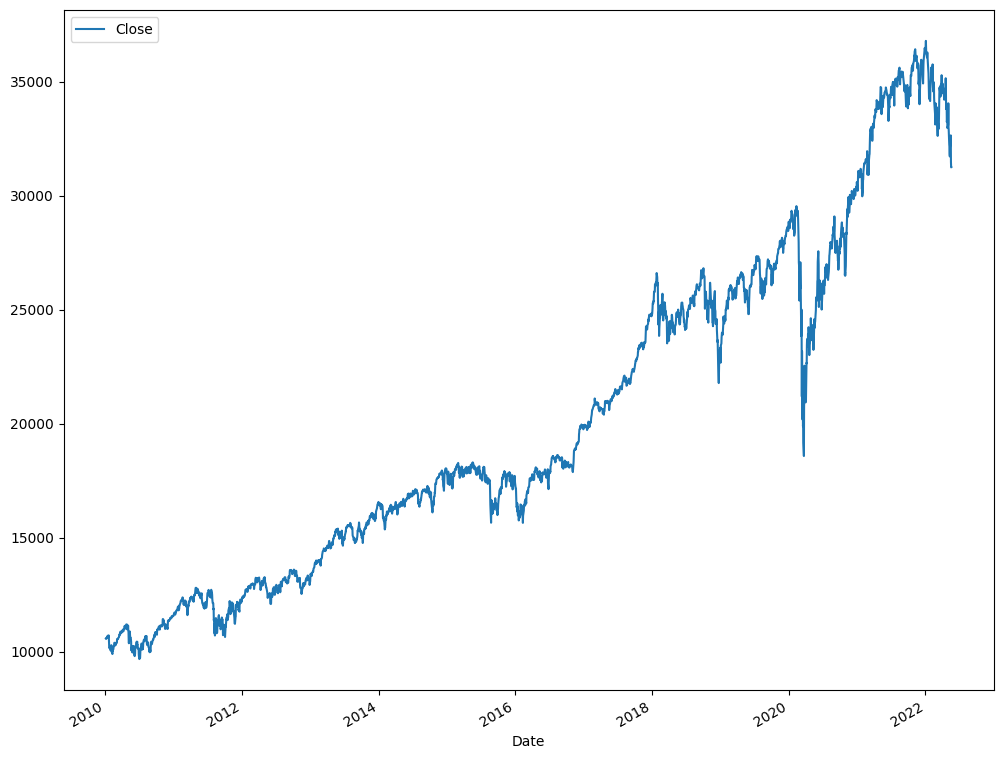

In [17]:
df.plot(figsize=(12,10),fontsize=10)

In [18]:
df["Return"]=df.pct_change()
df.dropna(inplace=True)

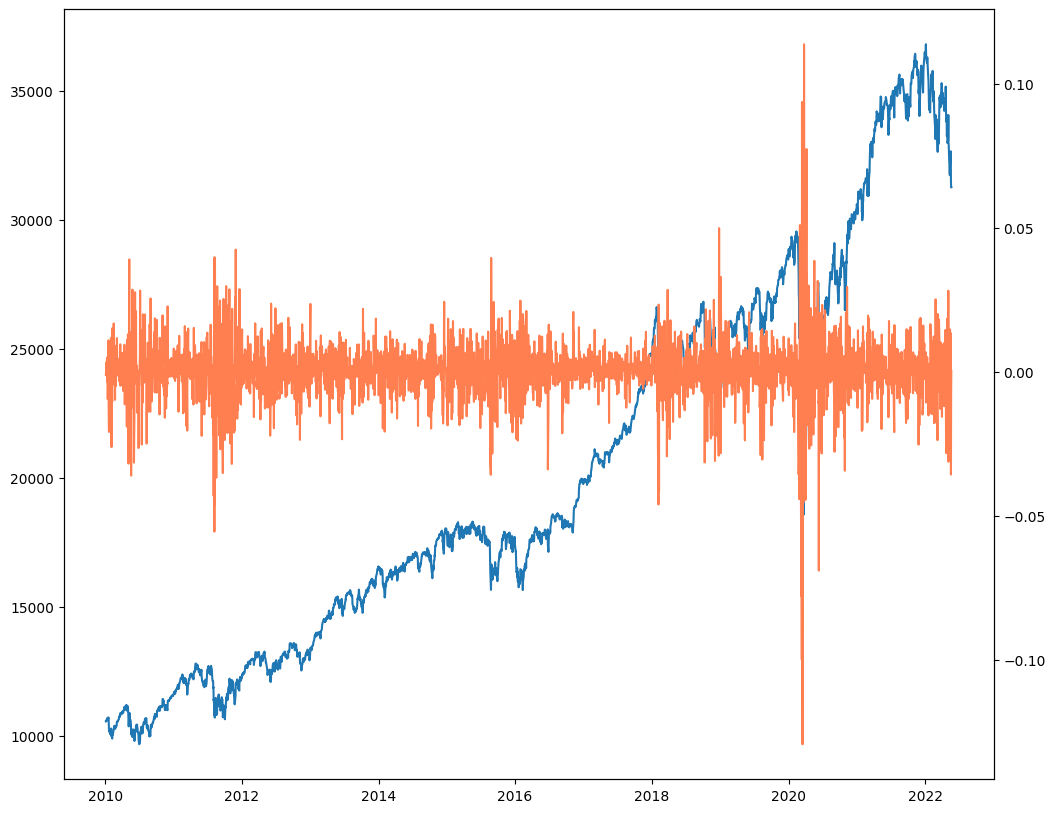

In [19]:
fig,axes = plt.subplots(1,1,figsize = (12,10))
axes.plot( df['Close'])
ax2 = axes.twinx()
ax2.plot(df['Return'],color = 'coral')

In [20]:
df.rename(columns = {"Close":"DJI_close", "Return":"DJI_return"},inplace=True)

## Backtesting

__Positions__:

+1: Investing in DJI (__long__ position) <br>
-1: Short Selling DJI (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into DJI and do nothing (Position: +1 on any given day)

-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into DJI tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ DJI tomorrow if today´s return was __negative__

In [21]:
df['Position'] = np.sign(df['DJI_return'])

In [22]:
df.head()

,DJI_close,DJI_return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0


In [23]:
df['Strat_return'] = df['Position'].shift().multiply(df['DJI_return'])

In [24]:
df['Strategy'] = df['Strat_return'].add(1,fill_value=0).cumprod() * df.iloc[0,0]
df.head()

,DJI_close,DJI_return,Position,Strat_return,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563


<Axes: xlabel='Date'>

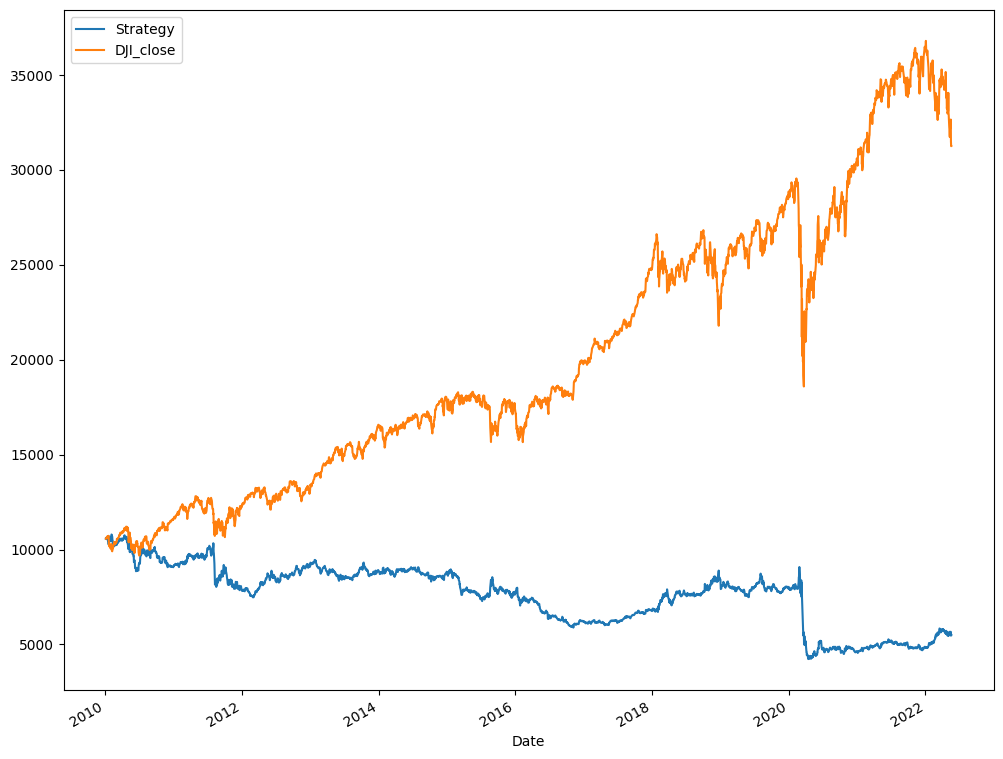

In [25]:
df[['Strategy','DJI_close']].plot(figsize=(12,10))

In [26]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [27]:
summary_ann(df[['DJI_return','Strat_return']])

,Return,Risk
DJI_return,0.102292,0.171146
Strat_return,-0.037995,0.171252
